In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
features=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [4]:
for i in features:
    if data[i].isna().any():
                print(i)

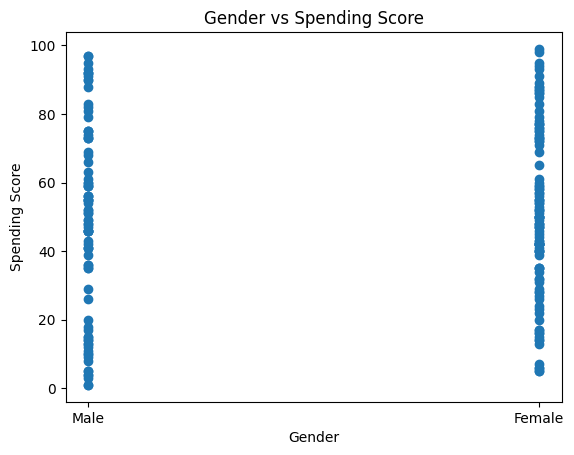

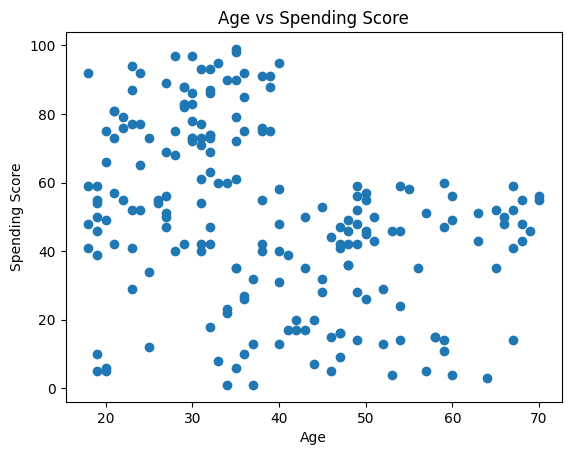

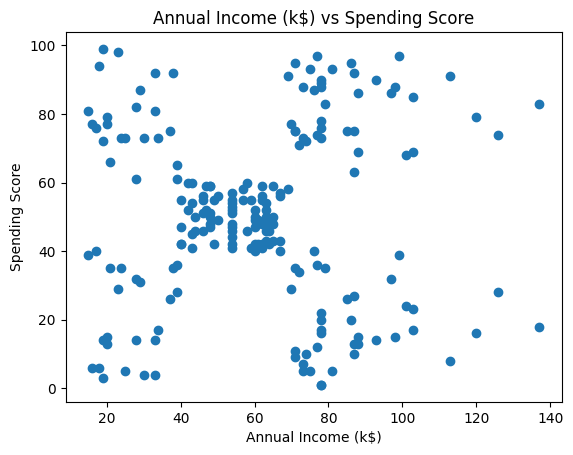

In [5]:
%matplotlib inline

for i in features[:3]:
    plt.title(f"{i} vs Spending Score")
    plt.xlabel(i)
    plt.ylabel("Spending Score")
    plt.scatter(data[i],data['Spending Score (1-100)'])

    plt.show(block=True)

In [6]:
# Choosing all Three features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choosing only Annual Income and Spending Score
Y = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

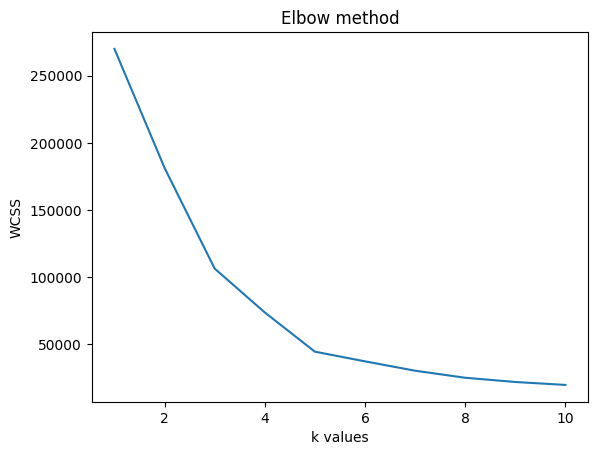

In [8]:
plt.plot(range(1,11), wcss)
plt.xlabel('k values')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [9]:
model_1 = KMeans(n_clusters = 5, random_state = 42)

In [10]:
y_kmeans1 = model_1.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


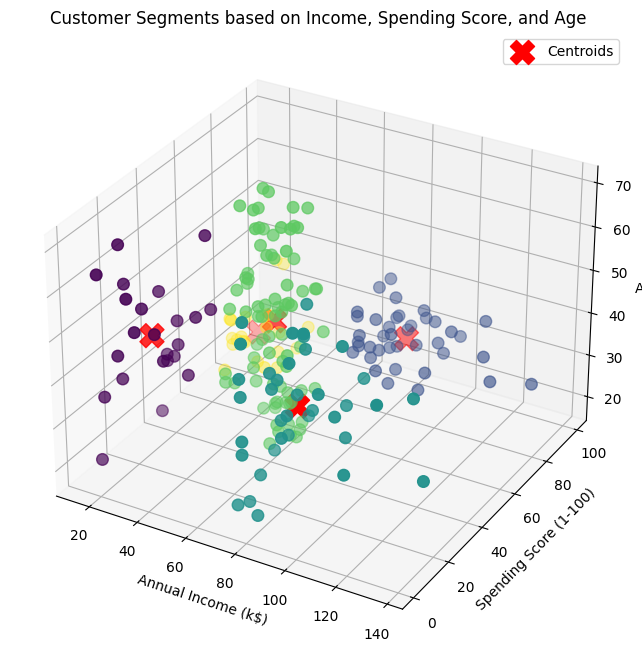

In [11]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], X['Age'], c=y_kmeans1, s=70, cmap='viridis')

# Plot centroids (optional)
ax.scatter(model_1.cluster_centers_[:, 1], model_1.cluster_centers_[:, 2], model_1.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('Customer Segments based on Income, Spending Score, and Age')
ax.legend()

# Ensure the plot is displayed correctly in Jupyter Notebook
plt.show(block=True)

In [12]:
model_2 = KMeans(n_clusters = 5, random_state = 42)
y_kmeans2 = model_2.fit_predict(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


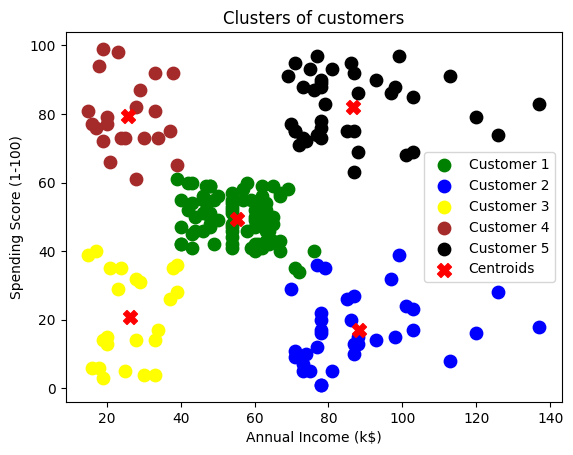

In [13]:
%matplotlib inline

plt.scatter(Y[y_kmeans2 == 0,0], Y[y_kmeans2 == 0,1], s = 80, c = "green", label = 'Customer 1')
plt.scatter(Y[y_kmeans2 == 1,0], Y[y_kmeans2 == 1,1], s = 80, c = "blue", label = 'Customer 2')
plt.scatter(Y[y_kmeans2 == 2,0], Y[y_kmeans2 == 2,1], s = 80, c = "yellow", label = 'Customer 3')
plt.scatter(Y[y_kmeans2 == 3,0], Y[y_kmeans2 == 3,1], s = 80, c = "brown", label = 'Customer 4')
plt.scatter(Y[y_kmeans2 == 4,0], Y[y_kmeans2 == 4,1], s = 80, c = "black", label = 'Customer 5')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
model_1.inertia_

75378.76464074483

In [15]:
model_2.inertia_

44448.4554479337

Since model 2 has a lower inertia than model 1, it indicates more efficient clustering.
Hence, using Annual Income and Spending Score gives the best K means Clustering Model.